<a href="https://colab.research.google.com/github/JessePMelo/Challenge-telecom-x/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [3]:
import pandas as pd
import ast
df = pd.read_json(url)

In [4]:
df.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
df['customer'].apply(type).value_counts()

,count
customer,
<class 'dict'>,7267


In [7]:
df['phone'].apply(type).value_counts()

,count
phone,
<class 'dict'>,7267


In [8]:
df['internet'].apply(type).value_counts()

,count
internet,
<class 'dict'>,7267


In [9]:
df['account'].apply(type).value_counts()

,count
account,
<class 'dict'>,7267


#🔧 Transformação

In [10]:
df_normalizado = pd.concat([
    df[['customerID', 'Churn']],
    pd.json_normalize(df['customer']).add_prefix('customer_'),
    pd.json_normalize(df['phone']).add_prefix('phone_'),
    pd.json_normalize(df['internet']).add_prefix('internet_'),
    pd.json_normalize(df['account']).add_prefix('account_')
], axis=1)

In [27]:
df_normalizado.head(5)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


In [12]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [13]:
df_normalizado.to_csv('dados_normalizados.csv', index=False)

In [14]:
df_normalizado['account_Charges.Total'].apply(type).value_counts()

,count
account_Charges.Total,
<class 'str'>,7267


In [15]:
for col in df_normalizado.select_dtypes(exclude=['int64', 'float64']).columns:
    print(f"\n{col}: {df_normalizado[col].unique()}")


customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Churn: ['No' 'Yes' '']

customer_gender: ['Female' 'Male']

customer_Partner: ['Yes' 'No']

customer_Dependents: ['Yes' 'No']

phone_PhoneService: ['Yes' 'No']

phone_MultipleLines: ['No' 'Yes' 'No phone service']

internet_InternetService: ['DSL' 'Fiber optic' 'No']

internet_OnlineSecurity: ['No' 'Yes' 'No internet service']

internet_OnlineBackup: ['Yes' 'No' 'No internet service']

internet_DeviceProtection: ['No' 'Yes' 'No internet service']

internet_TechSupport: ['Yes' 'No' 'No internet service']

internet_StreamingTV: ['Yes' 'No' 'No internet service']

internet_StreamingMovies: ['No' 'Yes' 'No internet service']

account_Contract: ['One year' 'Month-to-month' 'Two year']

account_PaperlessBilling: ['Yes' 'No']

account_PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

account_Charges.Total: ['593.3' '542.4' '280.85' ... '74

In [16]:
df_normalizado['Churn'].value_counts(dropna=False)

,count
Churn,
No,5174
Yes,1869
,224


In [17]:
df_normalizado = df_normalizado[df_normalizado['Churn'].str.strip() != '']

In [18]:
df_normalizado['account_Charges.Monthly']

,account_Charges.Monthly
0,65.60
1,59.90
2,73.90
3,98.00
4,83.90
...,...
7262,55.15
7263,85.10
7264,50.30
7265,67.85


In [19]:
import datetime
import calendar

# Pega o ano e mês atual
hoje = datetime.date.today()
ano = hoje.year
mes = hoje.month

# Obtém o número de dias no mês atual
dias_no_mes = calendar.monthrange(ano, mes)[1]
dias_no_mes

30

In [20]:
df_normalizado["Contas_Diarias"]= df_normalizado['account_Charges.Monthly']/dias_no_mes

In [24]:
df_normalizado.head(5)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


#📊 Carga e análise

In [31]:
import pandas as pd

# Seleciona colunas numéricas
colunas_numericas = df_normalizado.select_dtypes(include=['int64', 'float64']).columns

# Estatísticas descritivas
resumo = df_normalizado[colunas_numericas].describe().T

# Exibe
print(resumo)


                          count       mean        std        min        25%  \
customer_SeniorCitizen   7043.0   0.162147   0.368612   0.000000   0.000000   
customer_tenure          7043.0  32.371149  24.559481   0.000000   9.000000   
account_Charges.Monthly  7043.0  64.761692  30.090047  18.250000  35.500000   
Contas_Diarias           7043.0   2.158723   1.003002   0.608333   1.183333   

                            50%     75%         max  
customer_SeniorCitizen    0.000   0.000    1.000000  
customer_tenure          29.000  55.000   72.000000  
account_Charges.Monthly  70.350  89.850  118.750000  
Contas_Diarias            2.345   2.995    3.958333  


In [33]:
df_cancelados = df_normalizado[df_normalizado['Churn'] == 'Yes']
df_cancelados

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,Contas_Diarias
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.796667
18,0022-TCJCI,Yes,Male,1,No,No,45,Yes,No,DSL,...,Yes,No,No,Yes,One year,No,Credit card (automatic),62.70,2791.5,2.090000
19,0023-HGHWL,Yes,Male,1,No,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.10,25.1,0.836667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,9961-JBNMK,Yes,Male,1,No,No,21,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),96.80,2030.3,3.226667
7246,9965-YOKZB,Yes,Male,1,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,83.85,790.15,2.795000
7260,9985-MWVIX,Yes,Female,0,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.15,70.15,2.338333
7261,9986-BONCE,Yes,Female,0,No,No,4,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.5,0.698333


In [34]:
df_normalizado

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


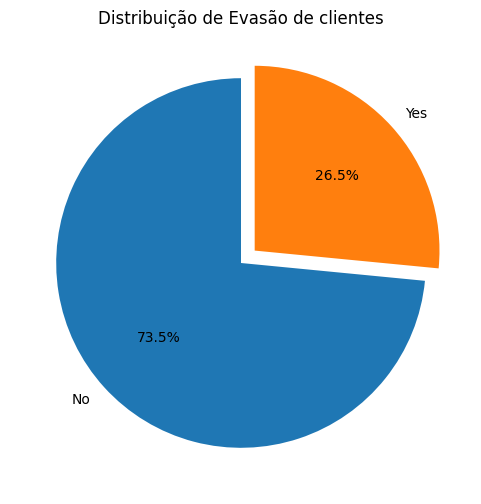

In [37]:
import matplotlib.pyplot as plt

churn_counts = df_normalizado['Churn'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.title('Distribuição de Evasão de clientes')
plt.show()


Evasão por genero

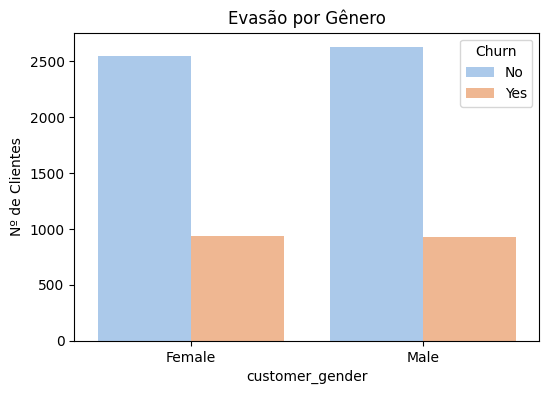

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df_normalizado, x='customer_gender', hue='Churn', palette='pastel')
plt.title('Evasão por Gênero')
plt.ylabel('Nº de Clientes')
plt.show()

Evasão por tipo de contrato

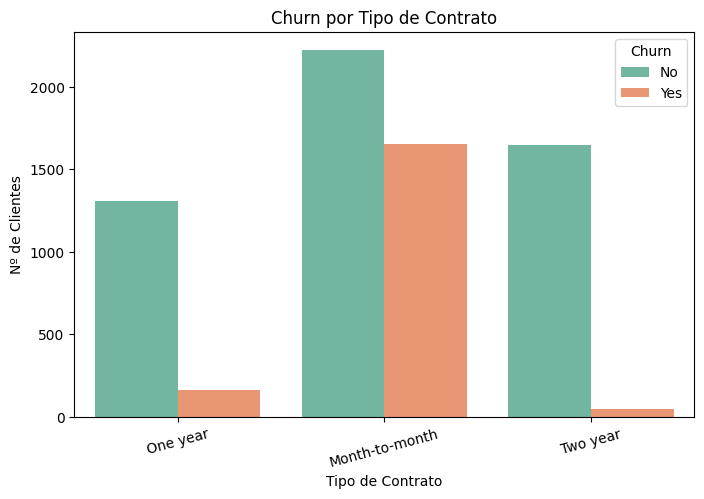

In [41]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_normalizado, x='account_Contract', hue='Churn', palette='Set2')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Nº de Clientes')
plt.xticks(rotation=15)
plt.show()

Evasão por metodo de pagamento

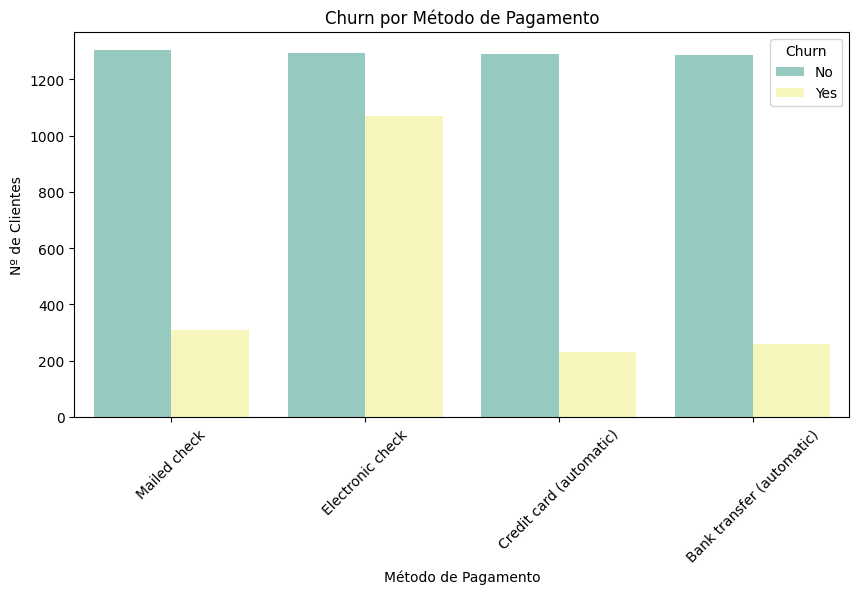

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_normalizado, x='account_PaymentMethod', hue='Churn', palette='Set3')
plt.title('Churn por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Nº de Clientes')
plt.xticks(rotation=45)
plt.show()

Evasão por dependetes

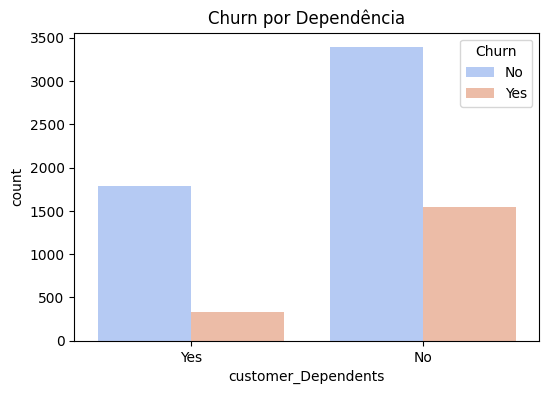

In [43]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_normalizado, x='customer_Dependents', hue='Churn', palette='coolwarm')
plt.title('Churn por Dependência')
plt.show()

In [44]:
proporcao_churn = df_normalizado.groupby('account_Contract')['Churn'].value_counts(normalize=True).unstack()
print(proporcao_churn)

Churn                   No       Yes
account_Contract                    
Month-to-month    0.572903  0.427097
One year          0.887305  0.112695
Two year          0.971681  0.028319


Contagem de evasão por variaveis numericas.

In [45]:
df_normalizado['account_Charges.Total'] = pd.to_numeric(df_normalizado['account_Charges.Total'], errors='coerce')

<ipython-input-47-8e3674d7ff6a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normalizado, x='Churn', y='customer_tenure', palette='pastel')


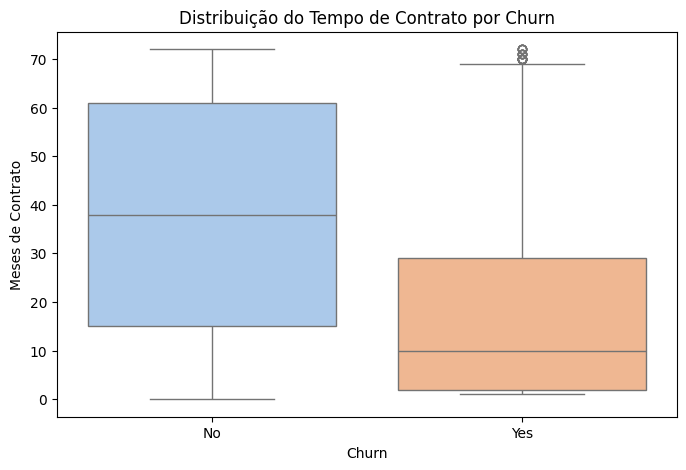

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=df_normalizado, x='Churn', y='customer_tenure', palette='pastel')
plt.title('Distribuição do Tempo de Contrato por Churn')
plt.ylabel('Meses de Contrato')
plt.show()


<ipython-input-48-6816d9f0670a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normalizado, x='Churn', y='account_Charges.Monthly', palette='Set2')


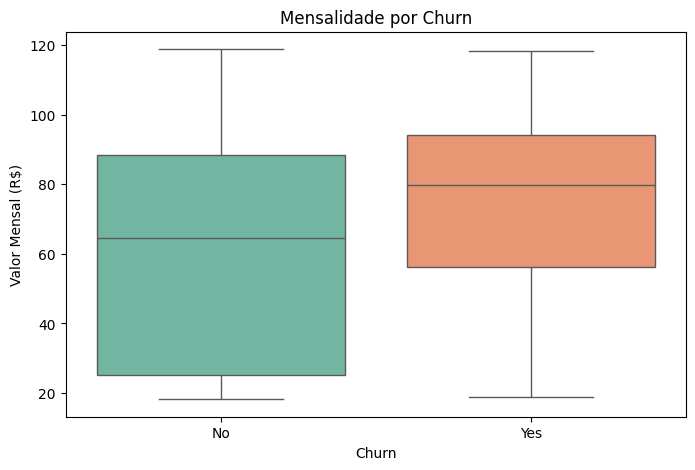

In [48]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_normalizado, x='Churn', y='account_Charges.Monthly', palette='Set2')
plt.title('Mensalidade por Churn')
plt.ylabel('Valor Mensal (R$)')
plt.show()

In [49]:
df_normalizado.groupby('Churn')[['customer_tenure', 'account_Charges.Monthly', 'account_Charges.Total']].mean()

,customer_tenure,account_Charges.Monthly,account_Charges.Total
Churn,,,
No,37.569965,61.265124,2555.344141
Yes,17.979133,74.441332,1531.796094


#📄Relatorio Final